# TP logistic regression


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [185]:
#necessary imports
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

## Iris dataset

In this section, almost all the code is given. It is mandatory to understand all the code and operations before running the next cells.

In [186]:
# loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
iris.keys()
iris.feature_names
#iris.target_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [187]:
# standardisation of data
scaler = StandardScaler().fit(X)
Xscaled = scaler.transform(X)


### Classification in 2 classes

In [188]:
# we first extract the classes 0 and 1 from the dataset
Xbin = Xscaled[y<2]
ybin = y[y<2]

Xbin
ybin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [189]:
# split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(Xbin, ybin, test_size=0.4)

In [190]:
# logistic regression for binary classification
myLogReg = LogisticRegression()
#learning
myLogReg.fit(X_train,y_train)

LogisticRegression()

F1 score :  1.0


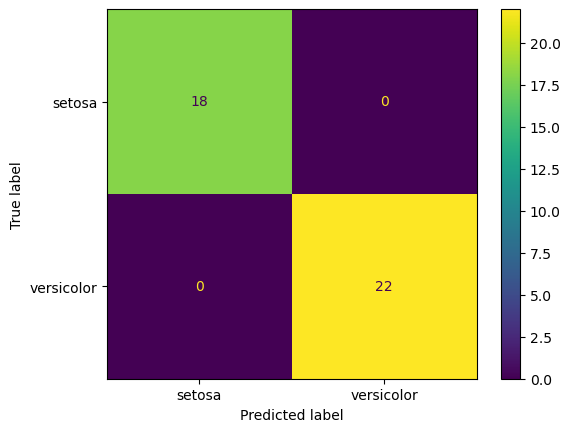

In [191]:
# evaluation
y_predBinaireTest = myLogReg.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_predBinaireTest, display_labels=iris.target_names[0:2])

print("F1 score : ", f1_score(y_test,y_predBinaireTest))

### all classes from Iris dataset

In [192]:
# split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.4)

In [193]:
# logistic regression for binary classification
myLogReg = LogisticRegression()
#learning
myLogReg.fit(X_train,y_train)

LogisticRegression()

F1 score :  [1.         0.875      0.88888889]


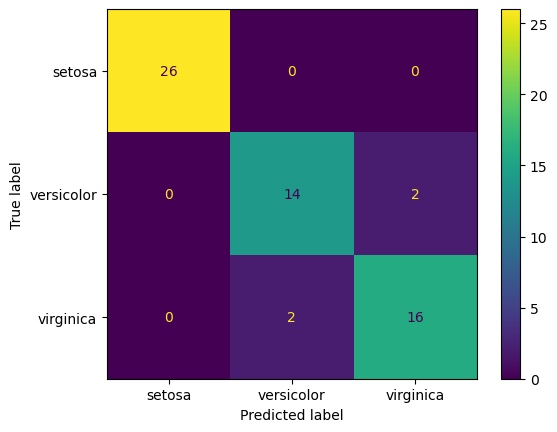

In [194]:
# evaluation
y_predBinaireTest = myLogReg.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_predBinaireTest, display_labels=iris.target_names)

print("F1 score : ", f1_score(y_test, y_predBinaireTest, average=None))

## MNIST dataset

In [232]:
# reading the dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [233]:
len(y_train)

60000

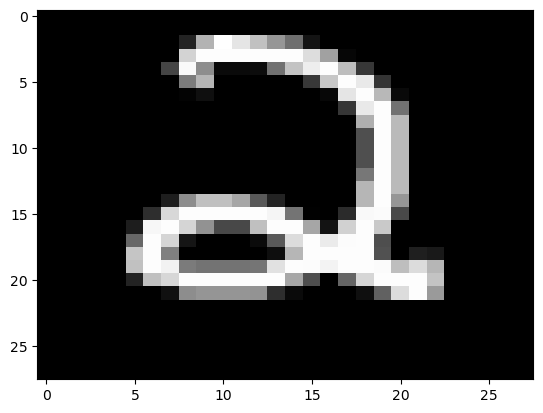

The true class is :  2


In [234]:
#display randomly one of the pictures

i = randint(0,len(y_train)-1)
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()
print("The true class is : ", y_train[i])

In [235]:
# reshaping the data (a 2d image is transformed to a 1d array)
#train
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [236]:
print(x_trainLin.shape)
print(x_testLin.shape)

(60000, 784)
(10000, 784)


In [237]:
print(np.max(x_trainLin))

255


In [238]:
# standardisation of data

#your work

scaler =StandardScaler().fit(x_trainLin)
Xscaled = scaler.transform(x_trainLin)
Xscaled.shape

(60000, 784)

In [239]:
# case of binary classification: let's choose 2 classes among the 10 classes: the 4's and the 8's

#your work

def filter_48(x, y):
    keep = (y == 4) | (y == 8)
    x, y = x[keep], y[keep]
    y=y == 4
    return x,y

x_train, y_train = filter_48(Xscaled, y_train)
x_test, y_test = filter_48(x_testLin, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 11693
Number of filtered test examples: 1956


In [240]:
# learn of logistic regressions

#your work

myLogReg = LogisticRegression()
#learning
myLogReg.fit(x_train,y_train)

C:\Users\SamiYa bou\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

F1 score :  [0.99023136 0.99034062]


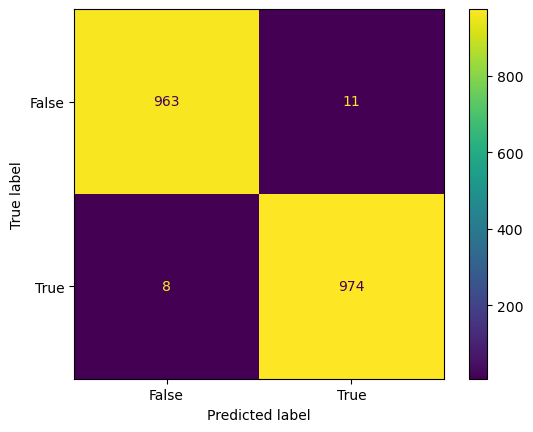

In [242]:
# compute and display the f1 score and the confusion matrixs

#your work

# evaluation
y_predBinaireTest = myLogReg.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_predBinaireTest)

print("F1 score : ", f1_score(y_test, y_predBinaireTest, average=None))

The logistic regression has been build with default parameters. Follow the recommandation and try different hints:
- algorithm terminaison: max number of iterations, ....
- data preprocessing: standardisation YES
- solver (liblinear, sag, saga, ...)
- regularisation

Did you get better results ? Did some converge faster ?

### The whole dataset with the 10 classes

In [169]:
# same work as the binary classification but now using the whole dataset with the 10 classes

In [243]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [244]:
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [245]:
# standardisation of data

#your work

scaler =StandardScaler().fit(x_trainLin)
Xscaled = scaler.transform(x_trainLin)
Xscaled.shape

(60000, 784)

In [246]:
# learn of logistic regressions

#your work

myLogReg = LogisticRegression()
#learning
myLogReg.fit(Xscaled,y_train)

C:\Users\SamiYa bou\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

F1 score :  [0.94382022 0.91046183 0.85373781 0.88       0.90182186 0.41666667
 0.92609819 0.89979123 0.65708275 0.8731203 ]


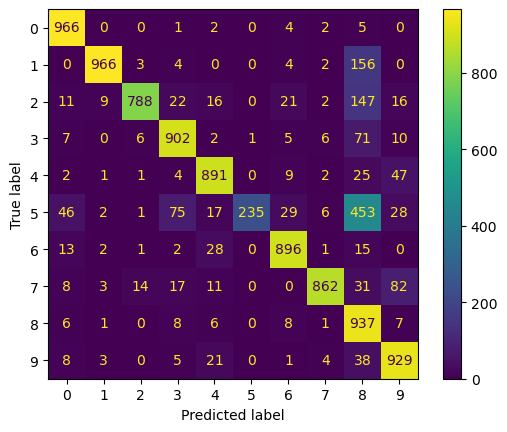

In [247]:
# compute and display the f1 score and the confusion matrixs

#your work

# evaluation
y_predBinaireTest = myLogReg.predict(x_testLin)

ConfusionMatrixDisplay.from_predictions(y_test, y_predBinaireTest)

print("F1 score : ", f1_score(y_test, y_predBinaireTest, average=None))

## Do you obtain the same results with FMNIST ? (fashion MNIST)

In [248]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


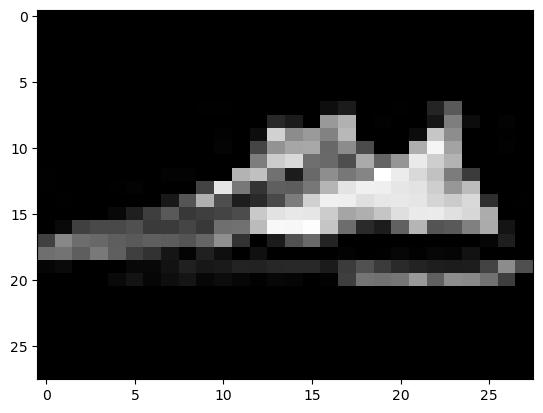

the true class is :  7


In [249]:
i=randint(0,len(y_train)-1)
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()
print("the true class is : ",y_train[i])

In [250]:
n = x_train.shape[0]
x_trainLin = x_train.reshape(n,-1)
#test
n = x_test.shape[0]
x_testLin = x_test.reshape(n,-1)

In [251]:
# standardisation of data

#your work

scaler =StandardScaler().fit(x_trainLin)
Xscaled = scaler.transform(x_trainLin)
Xscaled.shape

(60000, 784)

In [252]:
# learn of logistic regressions

myLogReg = LogisticRegression()
#learning
myLogReg.fit(x_trainLin,y_train)

C:\Users\SamiYa bou\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

F1 score :  [0.812      0.96288867 0.73296867 0.84657129 0.74474187 0.91572456
 0.59203445 0.91785539 0.93762376 0.93610698]


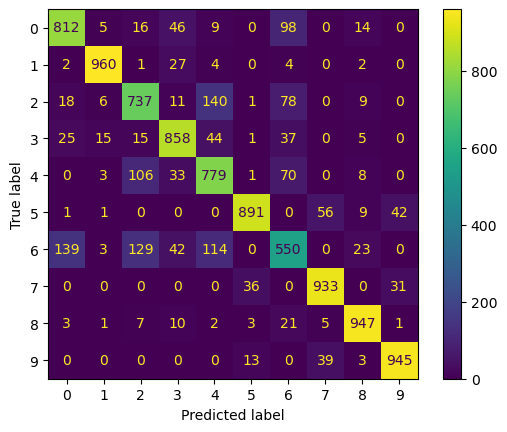

In [253]:
# evaluation
y_predBinaireTest = myLogReg.predict(x_testLin)

ConfusionMatrixDisplay.from_predictions(y_test, y_predBinaireTest)

print("F1 score : ", f1_score(y_test, y_predBinaireTest, average=None))